<a href="https://colab.research.google.com/github/tmc2/Projeto_estatistica_2020.1/blob/master/3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture

%cd ..
%load_ext autoreload
%autoreload 2

In [ ]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

pd.set_option('expand_frame_repr', True)
pd.set_option('display.column_space', 6)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.show_dimensions', True)

# Análise Exploratória

## Carregamento dos Dados

In [ ]:
PROCESSED_DATA_FOLDER = Path('data/processed/')
data_df = pd.read_csv(PROCESSED_DATA_FOLDER/"fake_true_news_cleaned.csv", index_col=0)
data_df["class"] = data_df["class"].astype('category')

## Correlação

In [ ]:
def correlation_heatmap(data, **kwargs):
    corr = data.corr()
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    f, ax = plt.subplots(**kwargs)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    plt.show()

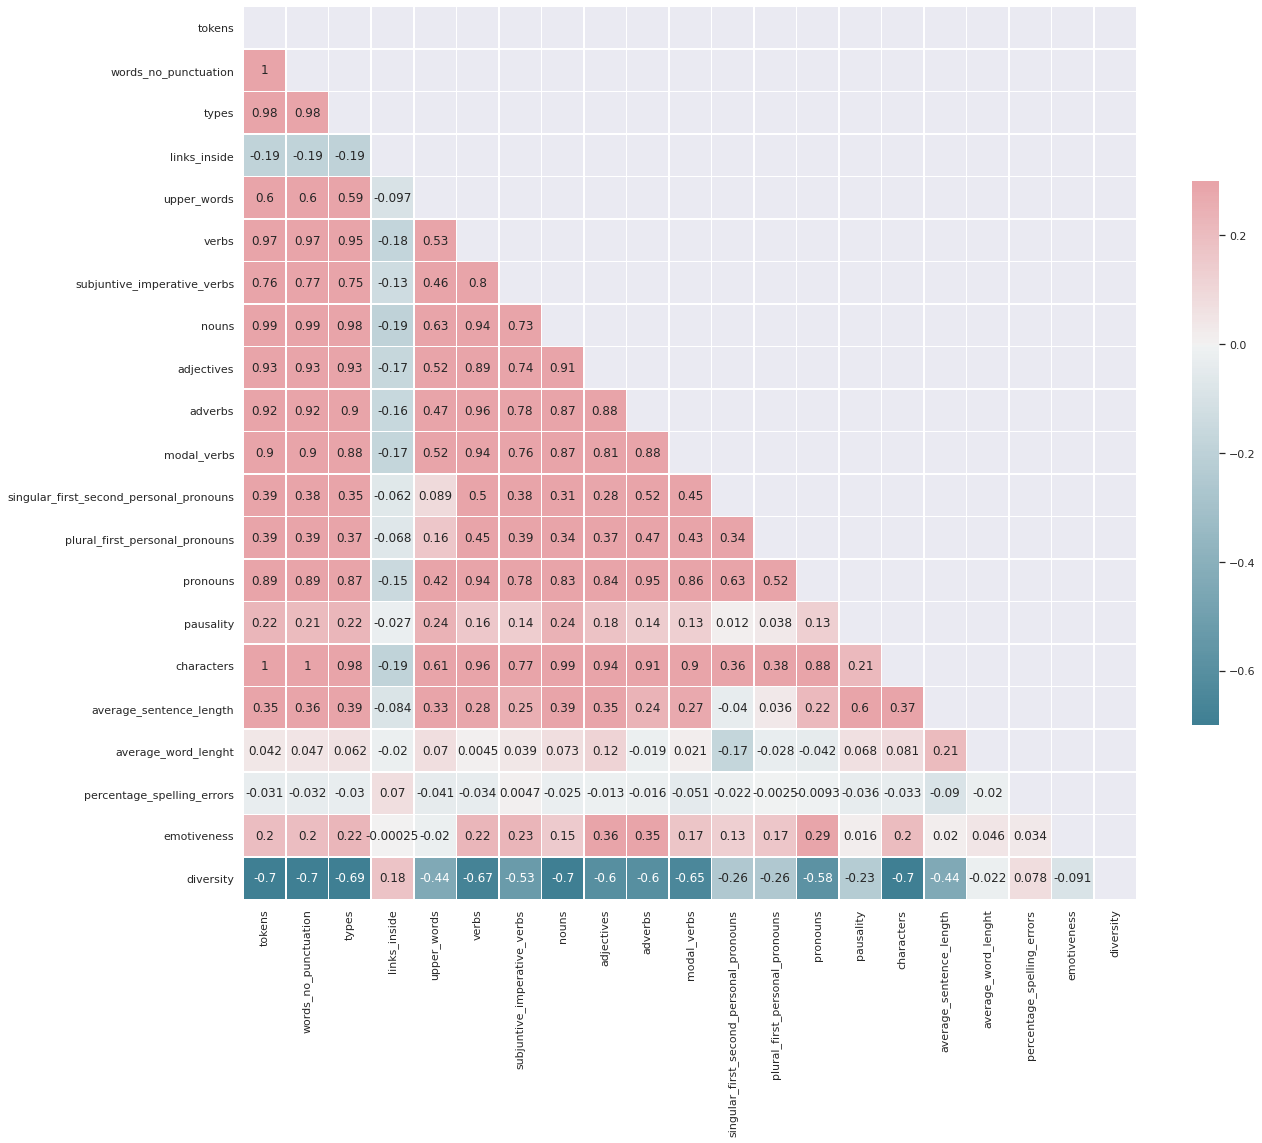

In [ ]:
correlation_heatmap(data_df[CONTINUOUS_VARIABLES], figsize=(20, 20))

## Distribuições

In [ ]:
CONTINUOUS_VARIABLES = [x for x, y in data_df.dtypes.iteritems() if str(y) not in ('category', 'object')]

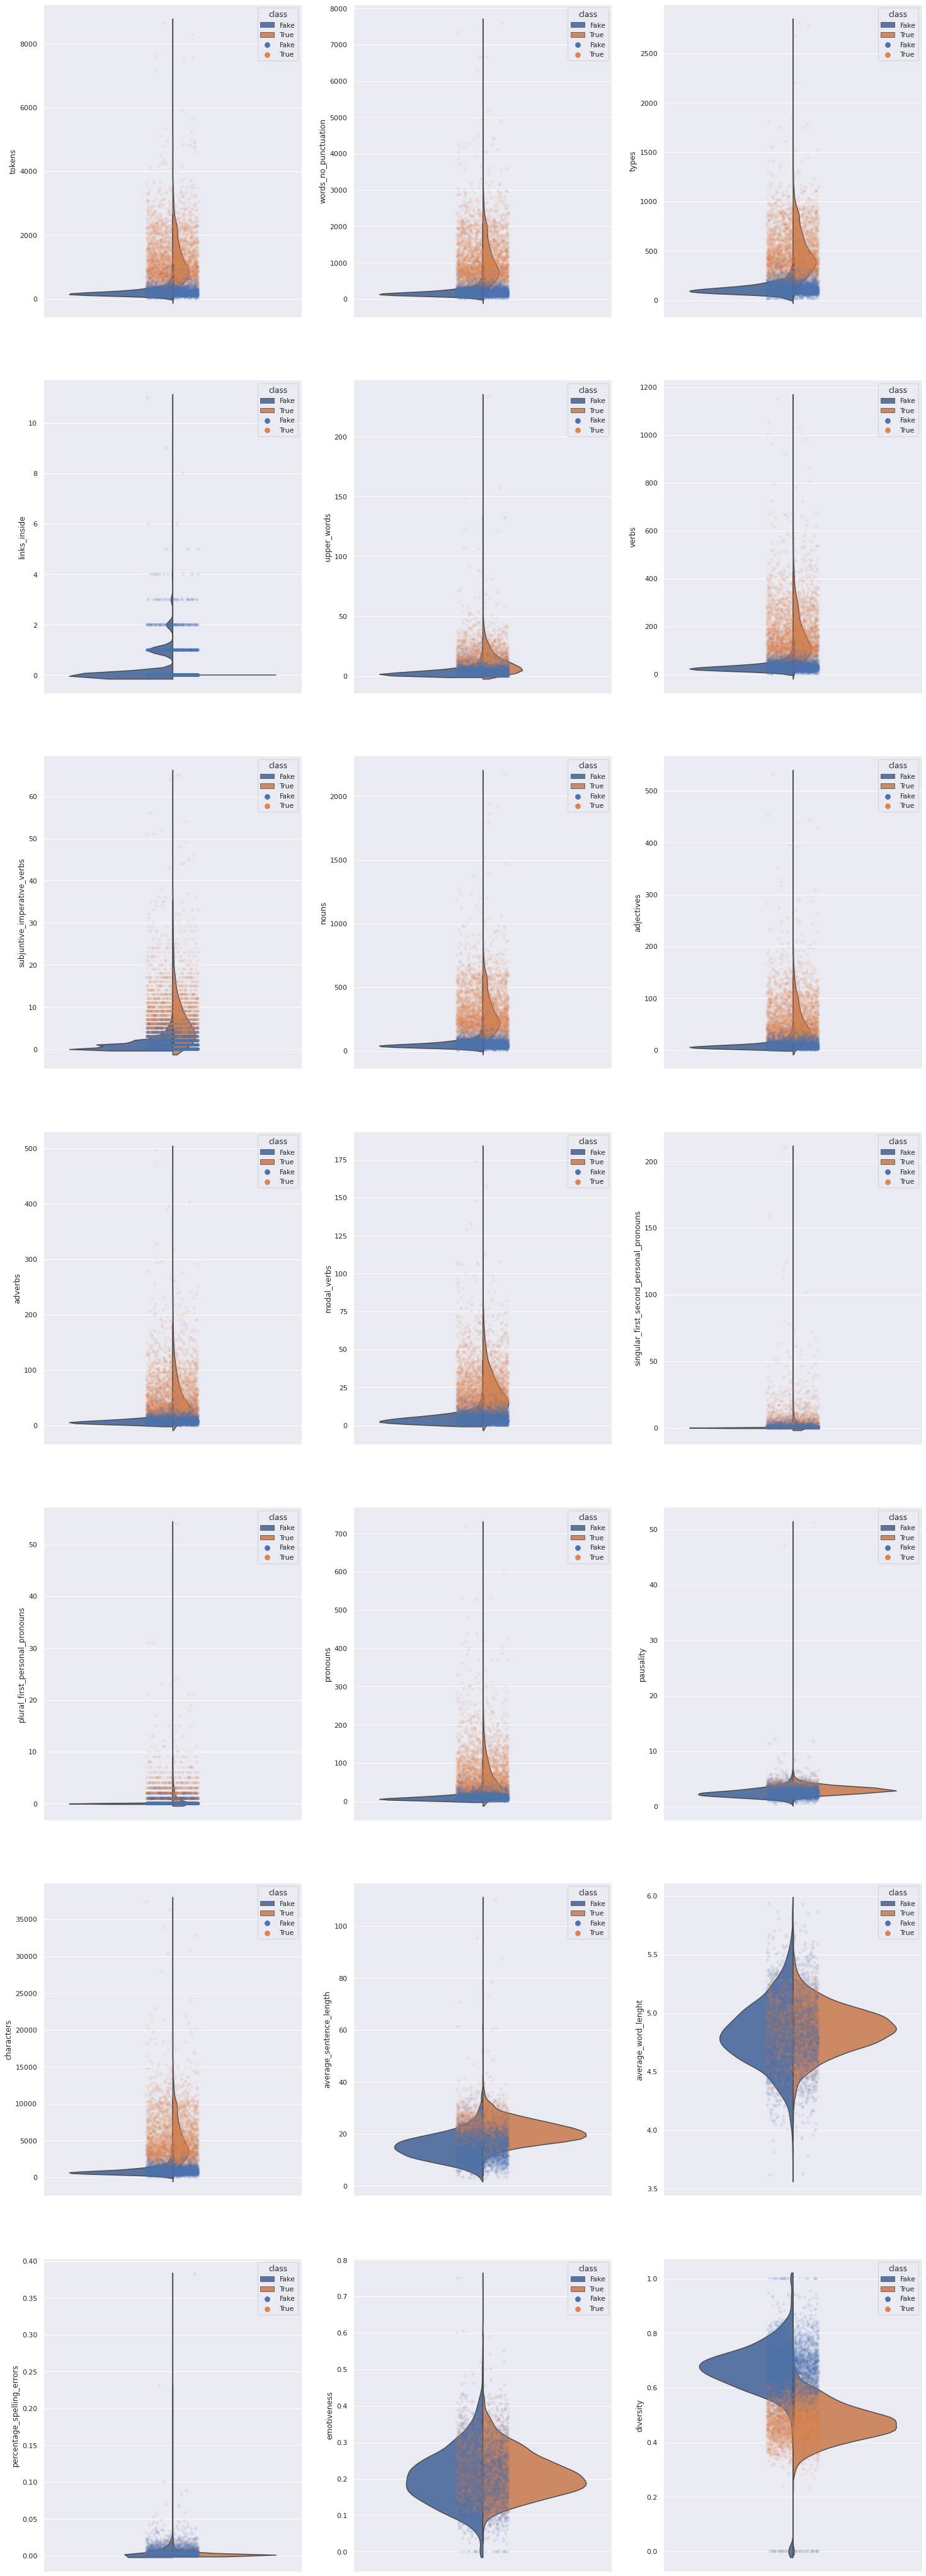

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=7, figsize=(25, 75), sharex=False, sharey=False)
plot_data_df = data_df.copy()
plot_data_df["all"] = ""
for col, ax in zip(CONTINUOUS_VARIABLES, axes.flat):
    sns.violinplot(x="all", data=plot_data_df, y=col, hue='class', cut=True, split=True, ax=ax, vars=data_df.columns)
    sns.stripplot(x="all", data=plot_data_df, y=col, hue='class', alpha=.1, ax=ax)
    ax.set_xlabel("")

plt.show()